In [27]:
import math
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load data and split up target and predictors
data = pd.read_excel("Boston_Housing.xlsx")
y = data['MEDV']                # target
X = data.drop(columns=['MEDV']) # features
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [28]:
# Cost function (Mean Squared Error)
def compute_cost(X, y, w, b): 
    m = X.shape[0] 

    f_wb = np.dot(X, w) + b
    cost = np.sum(np.power(f_wb - y, 2))

    total_cost = 1 / (2 * m) * cost

    return total_cost

# Gradient of the cost function
def compute_gradient(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    err = (np.dot(X, w) + b) - y
    dj_dw = np.dot(X.T, err)    # dimension: (n,m)*(m,1)=(n,1)
    dj_db = np.sum(err)

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

# Gradient descent algorithm to minimize the cost function
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        # Compute gradient
        dj_db, dj_dw = gradient_function(X, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = cost_function(X, y, w, b)
        J_history.append(cost)

        # Print progress every 10% of total iterations
        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")

    return w, b, J_history

# Return predictions using the learned linear model
def predict(X, w, b):
    p = np.dot(X, w) + b
    return p

# Plot training cost curve
def plot_cost(data, cost_type="Cost"):
    plt.figure(figsize=(4, 2))
    plt.plot(data)
    plt.xlabel("Iteration Step")
    plt.ylabel(cost_type)
    plt.title("Cost vs. Iteration")
    plt.show()

# Plot predicted vs actual values
def plot_pred_actual(y_actual, y_pred):
    x_ul = int(math.ceil(max(y_actual.max(), y_pred.max()) / 10.0)) * 10
    plt.figure(figsize=(4, 4))
    plt.scatter(y_actual, y_pred)
    plt.xlim(0, x_ul)
    plt.ylim(0, x_ul)
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    plt.title("Predicted vs Actual values")
    plt.show()

In [29]:
# Ridge Regression (L2 Regularization)

# Compute the cost function for Ridge Regression (L2 Regularization)
def compute_cost_ridge(X, y, w, b, lambda_=1):
    m = X.shape[0]
    f_wb = np.dot(X, w) + b
    mse_cost = np.sum(np.power(f_wb - y, 2))
    reg_cost = np.sum(np.power(w, 2))
    total_cost = (1 / (2 * m)) * mse_cost + (lambda_ / (2 * m)) * reg_cost
    return total_cost

# Compute the gradient for Ridge Regression
def compute_gradient_ridge(X, y, w, b, lambda_):
    m = X.shape[0]
    err = np.dot(X, w) + b - y
    dj_dw = (np.dot(X.T, err) / m) + (lambda_ / m) * w
    dj_db = np.sum(err) / m
    return dj_db, dj_dw

# Perform batch gradient descent for Ridge Regression
def gradient_descent_RR(X, y, w_in, b_in, cost_function, gradient_function, alpha, lambda_=0.7, num_iters=1000):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w, b, lambda_)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        cost = cost_function(X, y, w, b, lambda_)
        J_history.append(cost)

        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")

    return w, b, J_history

In [30]:
# LASSO Regression (L1 Regularization)

# Compute the total cost for LASSO Regression.
def compute_cost_lasso(X, y, w, b, lambda_ = 1): 
    """
    Compute the total cost for LASSO Regression.
    Uses L1 regularization (sum of absolute weights).
    """
    m = X.shape[0]
    f_wb = np.dot(X, w) + b
    mse_cost = np.sum(np.power(f_wb - y, 2))
    reg_cost = np.sum(np.abs(w))  # L1 penalty term
    total_cost = (1 / (2 * m)) * mse_cost + (lambda_ / (2 * m)) * reg_cost
    return total_cost

# Soft threshold for coordinate descent
def soft_threshold(rho, lamda_):
    if rho < -lamda_:
        return rho + lamda_
    elif rho > lamda_:
        return rho - lamda_
    else:
        return 0

# Compute residuals
def compute_residuals(X, y, w, b):
    return y - (np.dot(X, w) + b)

# Compute rho for j-th weight
def compute_rho_j(X, y, w, b, j):
    X_k = np.delete(X, j, axis=1)
    w_k = np.delete(w, j)
    err = compute_residuals(X_k, y, w_k, b)
    X_j = X[:, j]
    rho_j = np.dot(X_j, err)
    return rho_j

# Coordinate Descent for LASSO
def coordinate_descent_lasso(X, y, w_in, b_in, cost_function, lambda_, num_iters=1000, tolerance=1e-4):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    n = X.shape[1]

    for i in range(num_iters):
        for j in range(n):
            X_j = X[:, j]
            rho_j = compute_rho_j(X, y, w, b, j)
            w[j] = soft_threshold(rho_j, lambda_) / np.sum(X_j ** 2)

        b = np.mean(y - np.dot(X, w))
        err = compute_residuals(X, y, w, b)
        cost = cost_function(X, y, w, b, lambda_)
        J_history.append(cost)

        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")

        if np.max(np.abs(err)) < tolerance:
            break

    return w, b, J_history

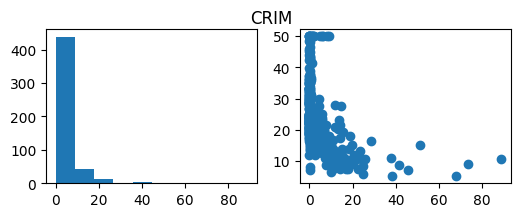

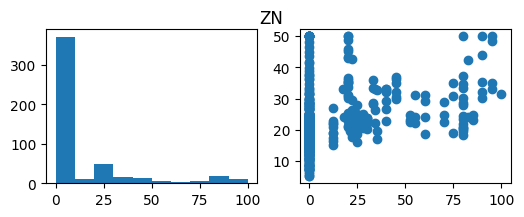

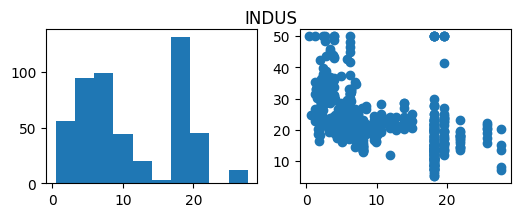

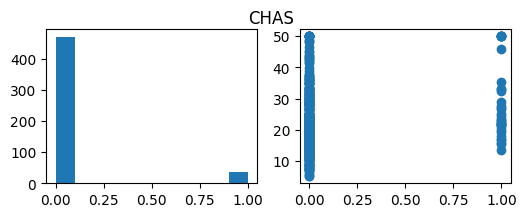

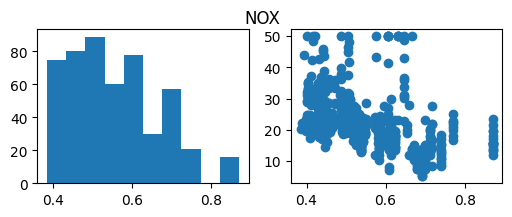

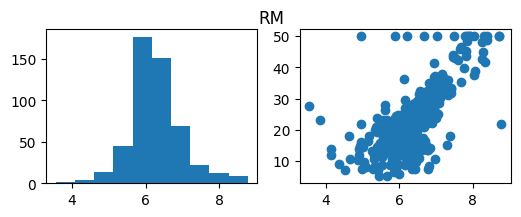

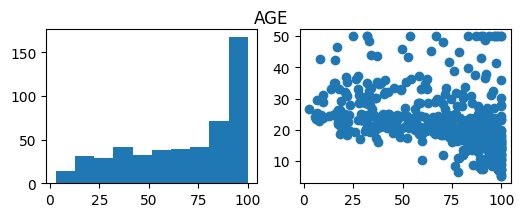

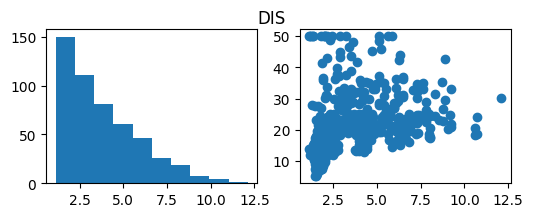

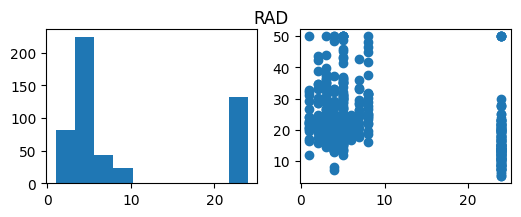

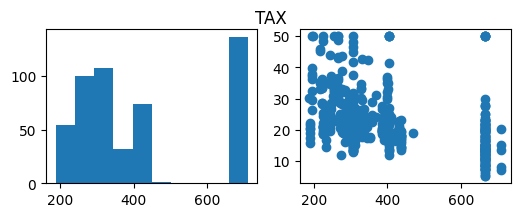

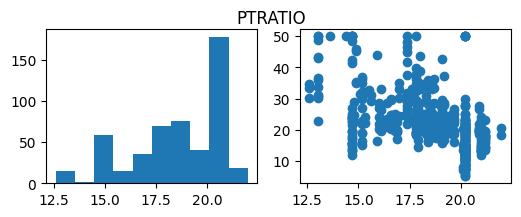

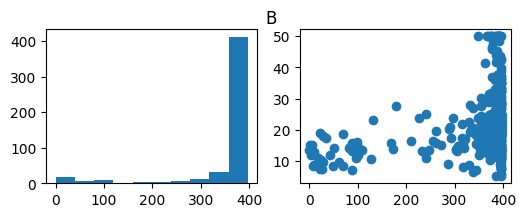

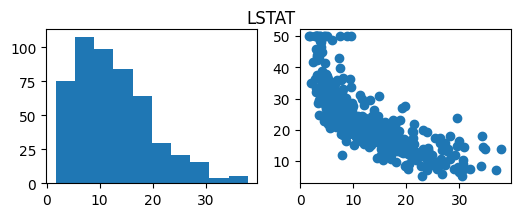

In [31]:
# Distribution of predictors and relationship with target
for col in X.columns:
    fig, ax = plt.subplots(1, 2, figsize=(6,2))
    ax[0].hist(X[col])
    ax[1].scatter(X[col], y)
    fig.suptitle(col)
    plt.show()


In [32]:
# Split into Train / Test
X_train, X_test, y_train, y_test = train_test_split(
    X.values, y.values, test_size=0.2, random_state=126
)
print(f"Train samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")


Train samples: 404, Test samples: 102


Iteration    0: Cost   182.09
Iteration  100: Cost    42.20
Iteration  200: Cost    41.44
Iteration  300: Cost    41.03
Iteration  400: Cost    40.67
Iteration  500: Cost    40.34
Iteration  600: Cost    40.05
Iteration  700: Cost    39.77
Iteration  800: Cost    39.52
Iteration  900: Cost    39.29
Training without normalization done.


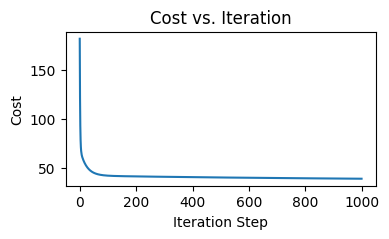

MSE without normalization: 64.6437


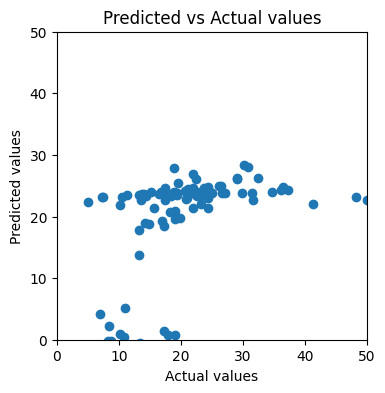

In [33]:
# Train Linear Regression (No Normalization)
w_init = np.zeros(X_train.shape[1])
b_init = 0
iterations = 1000
alpha = 1.0e-6

w_out, b_out, J_hist = gradient_descent(
    X_train, y_train, w_init, b_init,
    compute_cost, compute_gradient,
    alpha, iterations
)

print("Training without normalization done.")
plot_cost(J_hist, "Cost")

y_pred = predict(X_test, w_out, b_out)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE without normalization: {mse:.4f}")
plot_pred_actual(y_test, y_pred)


Iteration    0: Cost   299.39
Iteration  100: Cost    47.96
Iteration  200: Cost    16.32
Iteration  300: Cost    11.92
Iteration  400: Cost    11.20
Iteration  500: Cost    11.02
Iteration  600: Cost    10.94
Iteration  700: Cost    10.88
Iteration  800: Cost    10.84
Iteration  900: Cost    10.81
Training with normalization done.


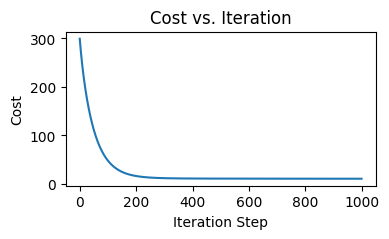

MSE with normalization: 26.1326


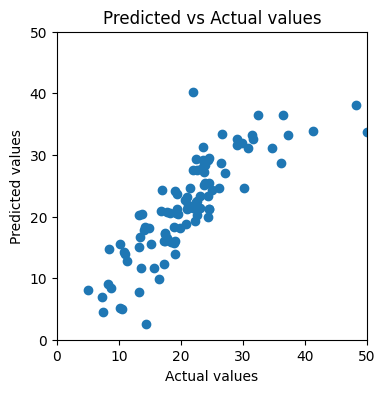

In [34]:
# Train Linear Regression (With Normalization)
standard_scaler = StandardScaler()
X_train_norm = standard_scaler.fit_transform(X_train)
X_test_norm = standard_scaler.transform(X_test)

w_init = np.zeros(X_train.shape[1])
b_init = 0
iterations_norm = 1000
alpha_norm = 1.0e-2

w_out_norm, b_out_norm, J_hist_norm = gradient_descent(
    X_train_norm, y_train, w_init, b_init,
    compute_cost, compute_gradient,
    alpha_norm, iterations_norm
)

print("Training with normalization done.")
plot_cost(J_hist_norm, "Cost")

y_pred_norm = predict(X_test_norm, w_out_norm, b_out_norm)
mse_norm = mean_squared_error(y_test, y_pred_norm)
print(f"MSE with normalization: {mse_norm:.4f}")
plot_pred_actual(y_test, y_pred_norm)


Iteration    0: Cost   299.39
Iteration  100: Cost    47.99
Iteration  200: Cost    16.36
Iteration  300: Cost    11.96
Iteration  400: Cost    11.25
Iteration  500: Cost    11.07
Iteration  600: Cost    10.99
Iteration  700: Cost    10.94
Iteration  800: Cost    10.90
Iteration  900: Cost    10.87

Training with Ridge Regression done.
Training result: w = [-0.8343394   0.82380926 -0.32282368  0.80018692 -1.27995764  3.08373296
 -0.23573497 -2.89879928  1.50058763 -0.77424845 -2.03651102  0.88122021
 -3.94481164], b = 22.91906001782267
Training MSE = 10.8504


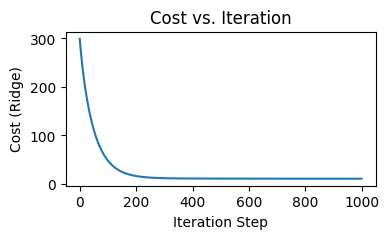

Test MSE with Ridge Regression: 26.0695


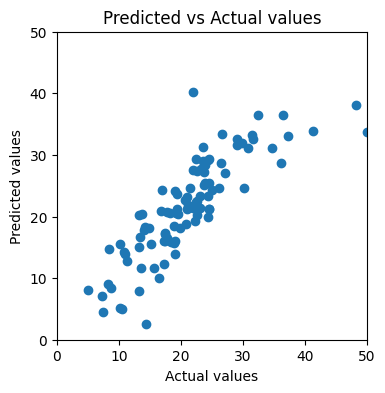

In [35]:
# Train Ridge Regression (L2)
w_init = np.zeros(X_train_norm.shape[1])
b_init = 0
iterations_ridge = 1000
alpha_ridge = 1.0e-2
lambda_ridge = 1

w_ridge, b_ridge, J_hist_ridge = gradient_descent_RR(
    X_train_norm, y_train,
    w_init, b_init,
    compute_cost_ridge, compute_gradient_ridge,
    alpha_ridge, lambda_=lambda_ridge, num_iters=iterations_ridge
)

print("\nTraining with Ridge Regression done.")
print(f"Training result: w = {w_ridge}, b = {b_ridge}")
print(f"Training MSE = {J_hist_ridge[-1]:.4f}")
plot_cost(J_hist_ridge, "Cost (Ridge)")

y_pred_ridge = predict(X_test_norm, w_ridge, b_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Test MSE with Ridge Regression: {mse_ridge:.4f}")
plot_pred_actual(y_test, y_pred_ridge)



Training with LASSO Regression...
Iteration    0: Cost    18.01
Iteration  100: Cost    10.69
Iteration  200: Cost    10.69
Iteration  300: Cost    10.69
Iteration  400: Cost    10.69
Iteration  500: Cost    10.69
Iteration  600: Cost    10.69
Iteration  700: Cost    10.69
Iteration  800: Cost    10.69
Iteration  900: Cost    10.69
Training with LASSO Regression done.
Training result: w = [-0.9716638   1.05919831  0.01770356  0.74740632 -1.72130959  2.90002204
 -0.15213328 -3.24358175  2.4797575  -1.71623275 -2.15341948  0.85369603
 -4.01009985], b = 22.920049504950516
Training MSE (final cost) = 10.6907
Test MSE with LASSO Regression: 25.5315


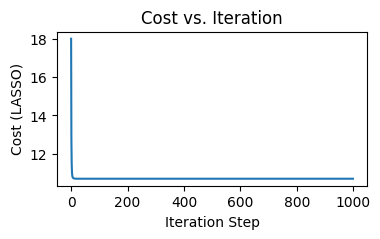

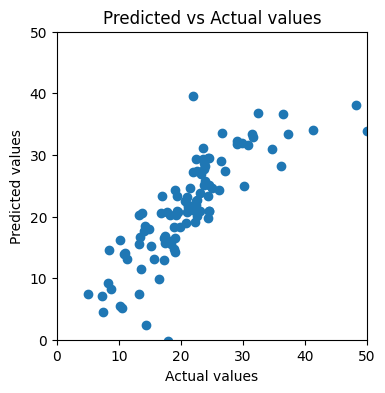

In [36]:
# Train LASSO Regression (L1)
print("\nTraining with LASSO Regression...")

w_init = np.zeros(X_train_norm.shape[1])
b_init = 0
iterations_lasso = 1000
lambda_lasso = 1e-4
tolerance = 1e-4

w_lasso, b_lasso, J_hist_lasso = coordinate_descent_lasso(
    X_train_norm, y_train,
    w_init, b_init,
    compute_cost_lasso,
    lambda_lasso, iterations_lasso, tolerance
)

print("Training with LASSO Regression done.")
print(f"Training result: w = {w_lasso}, b = {b_lasso}")
print(f"Training MSE (final cost) = {J_hist_lasso[-1]:.4f}")

y_pred_lasso = predict(X_test_norm, w_lasso, b_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Test MSE with LASSO Regression: {mse_lasso:.4f}")

plot_cost(J_hist_lasso, "Cost (LASSO)")
plot_pred_actual(y_test, y_pred_lasso)


In [37]:
# Model Performance Comparison
print("\n=== Model Performance Comparison ===")
print(f"Linear Regression (no normalization):   MSE = {mse:.4f}")
print(f"Linear Regression (normalized):         MSE = {mse_norm:.4f}")
print(f"Ridge Regression (λ={lambda_ridge}):    MSE = {mse_ridge:.4f}")
print(f"LASSO Regression (λ={lambda_lasso}):    MSE = {mse_lasso:.4f}") 


=== Model Performance Comparison ===
Linear Regression (no normalization):   MSE = 64.6437
Linear Regression (normalized):         MSE = 26.1326
Ridge Regression (λ=1):    MSE = 26.0695
LASSO Regression (λ=0.0001):    MSE = 25.5315


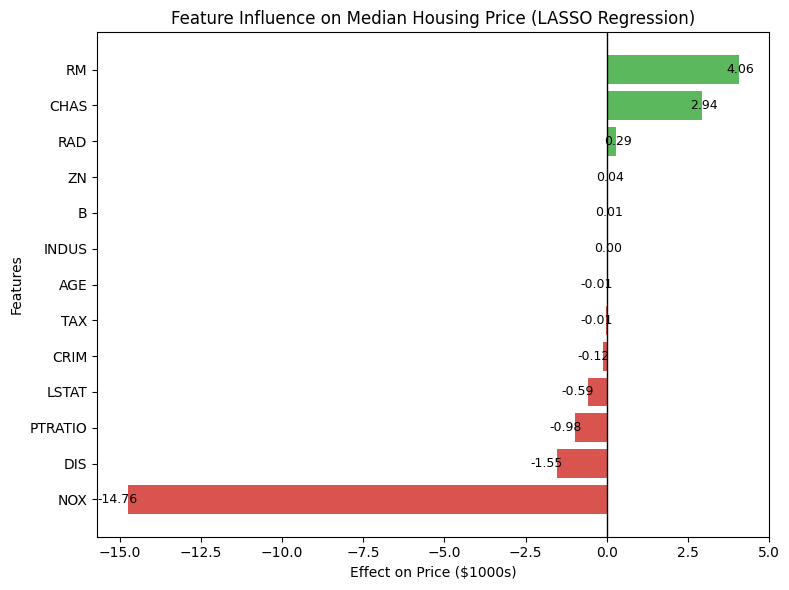

In [ ]:
# Visualizing Feature Influence

# Get feature names and unscaled weights
feature_names = list(X.columns)
scales = standard_scaler.scale_

# Convert LASSO weights back to original (unscaled) scale
w_unscaled = w_lasso / scales

# Sort by importance
sorted_idx = np.argsort(w_unscaled)
sorted_features = np.array(feature_names)[sorted_idx]
sorted_weights = w_unscaled[sorted_idx]

# Plot as a horizontal bar chart
plt.figure(figsize=(8,6))
bars = plt.barh(sorted_features, sorted_weights, color=['#d9534f' if w < 0 else '#5cb85c' for w in sorted_weights])
plt.axvline(0, color='black', linewidth=1)
plt.title("Feature Influence on Median Housing Price (LASSO Regression)", fontsize=12)
plt.xlabel("Effect on Price ($1000s)")
plt.ylabel("Features")

# Annotate value on bars
for bar, value in zip(bars, sorted_weights):
    plt.text(value + 0.05 if value > 0 else value - 0.3, bar.get_y() + bar.get_height()/2,
             f"{value:.2f}", va='center', ha='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()
